# Covid19

In [1]:
%load_ext lab_black

In [2]:
import intake
import pandas as pd

## Metadata

In [3]:
url_metadata = (
    "https://www.data.gouv.fr/fr/datasets/r/a8b5931a-3aa7-4aec-a81b-8b3de628cf63"
)

In [4]:
!mkdir -p data/covid; curl -s -o data/covid/metadata.xlsx -L $url_metadata

In [5]:
pd.read_excel("data/covid/metadata.xlsx")

,Colonne,Type,Description_FR,Description_EN,Exemple
0,dep,String,Departement,State,01
1,reg,String,Region,region,2
2,fra,String,France,France,FR
3,jour,Date,Jour,Day,2020-05-13
4,week,Date,Semaine,Week,2020-S21
5,pop,integer,"Population de reference (du departement, de la...","Reference population (department, region, nati...",656955
6,t,integer,Nombre de test réalisés,Number of tests performed,2141
7,cl_age90,integer,Classe d'age,Age class,09
8,p,integer,Nombre de test positifs,Number of positive tests,34
9,p_h,integer,Nombre de test positif chez les hommes,Number of positive test in men,1688


## Données

https://www.data.gouv.fr/fr/datasets/taux-dincidence-de-lepidemie-de-covid-19/

In [6]:
url = "https://www.data.gouv.fr/fr/datasets/r/19a91d64-3cd3-42fc-9943-d635491a4d76"

In [7]:
!curl -LO $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   473  100   473    0     0   1017      0 --:--:-- --:--:-- --:--:--  1017
100 3790k  100 3790k    0     0   208k      0  0:00:18  0:00:18 --:--:--  220k


In [8]:
import pyarrow.csv as csv
import pyarrow as pa

In [9]:
csv.ParseOptions(delimiter=";")

In [10]:
schema = pa.schema(
    {
        "dep": pa.string(),
        "jour": pa.string(),
        "pop": pa.float64(),
        "P": pa.int32(),
        "cl_age90": pa.int8(),
    }
)

In [11]:
table = csv.read_csv(
    "19a91d64-3cd3-42fc-9943-d635491a4d76",
    parse_options=csv.ParseOptions(delimiter=";"),
    convert_options=csv.ConvertOptions(column_types=schema),
)

In [12]:
dfpa = table.to_pandas().astype({"jour": "datetime64[ns]"})

In [13]:
dfpa.head()

,dep,jour,pop,P,cl_age90
0,01,2020-05-13,83001.0,0,9
1,01,2020-05-13,84665.0,1,19
2,01,2020-05-13,65496.0,0,29
3,01,2020-05-13,85588.0,1,39
4,01,2020-05-13,89678.0,0,49


In [14]:
dfpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153296 entries, 0 to 153295
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   dep       153296 non-null  object        
 1   jour      153296 non-null  datetime64[ns]
 2   pop       153296 non-null  float64       
 3   P         153296 non-null  int32         
 4   cl_age90  153296 non-null  int8          
dtypes: datetime64[ns](1), float64(1), int32(1), int8(1), object(1)
memory usage: 4.2+ MB


In [19]:
from matplotlib.axis import Axis

In [67]:
dfpa["pop"]

0         83001.00000
1         84665.00000
2         65496.00000
3         85588.00000
4         89678.00000
             ...     
153291     2878.06000
153292     1097.68600
153293      296.76760
153294       66.59655
153295    35746.00000
Name: pop, Length: 153296, dtype: float64

In [97]:
df2 = dfpa[dfpa.cl_age90 == 0]

In [105]:
df2.groupby("jour")

In [89]:
def plot_incidence(dpt: int, ax: Axis = None):
    _df = dfpa.copy()
    _df["P_pro_100k"] = dfpa.P / dfpa["pop"] * 100_000
    gp = _df.where(_df.dep == dpt).groupby("jour")
    (gp.P_pro_100k.sum() / 2).plot(ax=ax)
    (gp.P_pro_100k.sum() / 2).rolling(7).mean().plot(ax=ax)

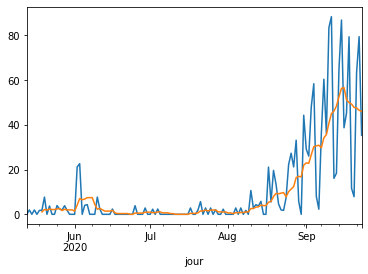

In [90]:
plot_incidence("43")

In [91]:
import matplotlib.pyplot as plt

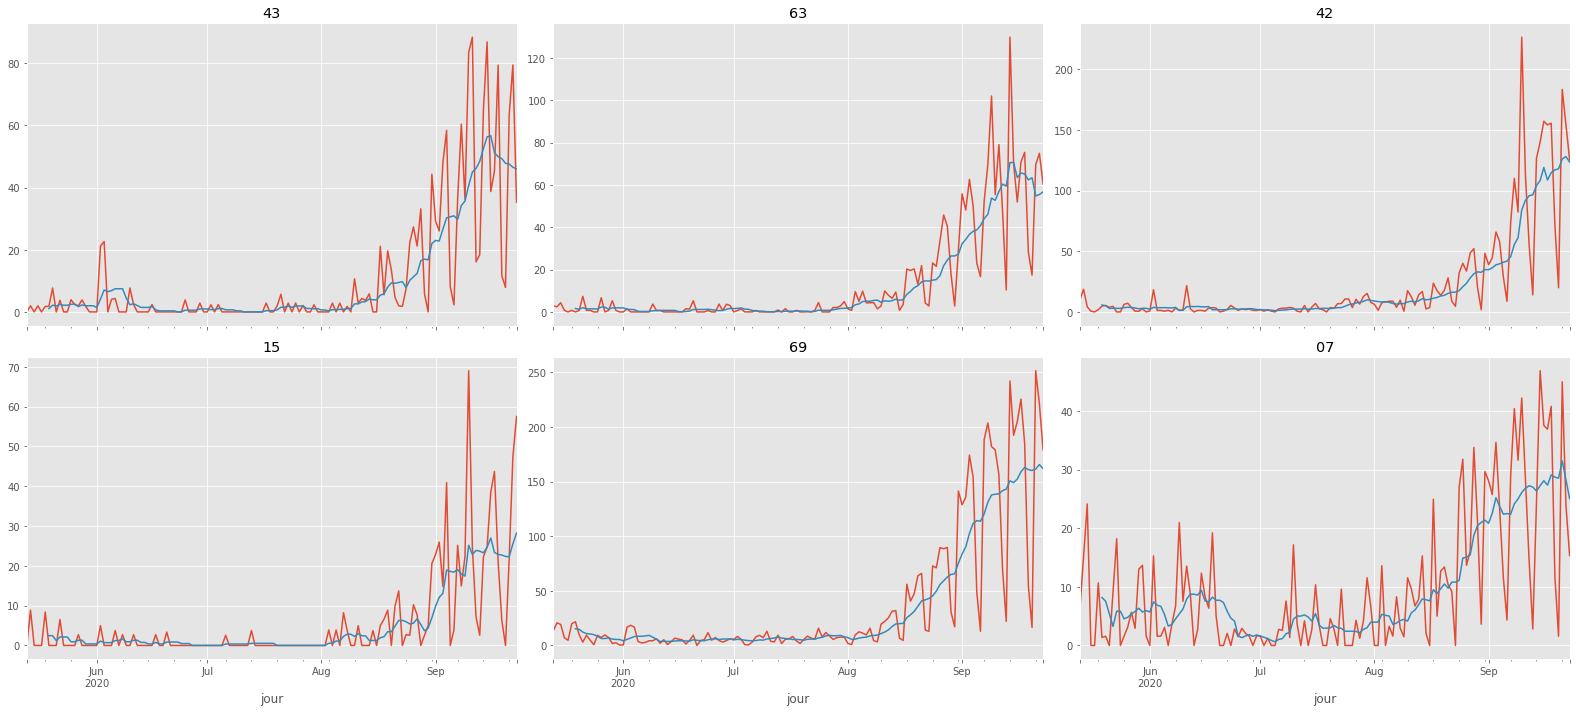

In [96]:
with plt.style.context("ggplot"):
    fig, axs = plt.subplots(2, 3, figsize=(22, 10), sharex=True)
    depts = [43, 63, 42, 15, 69, "07"]
    for ax, dept in zip(axs.ravel(), depts):
        plot_incidence(str(dept), ax)
        ax.set_title(dept)
    plt.tight_layout()

In [156]:
import numpy as np

In [157]:
today = np.sort(df.jour.unique())[-1]

In [158]:
today - np.timedelta64(7, 'D')

numpy.datetime64('2020-09-15T00:00:00.000000000')

In [159]:
import matplotlib.pyplot as plt

In [160]:
df['P_normed'] = df.P / df['pop'] * 100_000

In [161]:
df_today = df[df.jour >= today - np.timedelta64(7, 'D')]
gp_today_dep = df_today.groupby('dep')

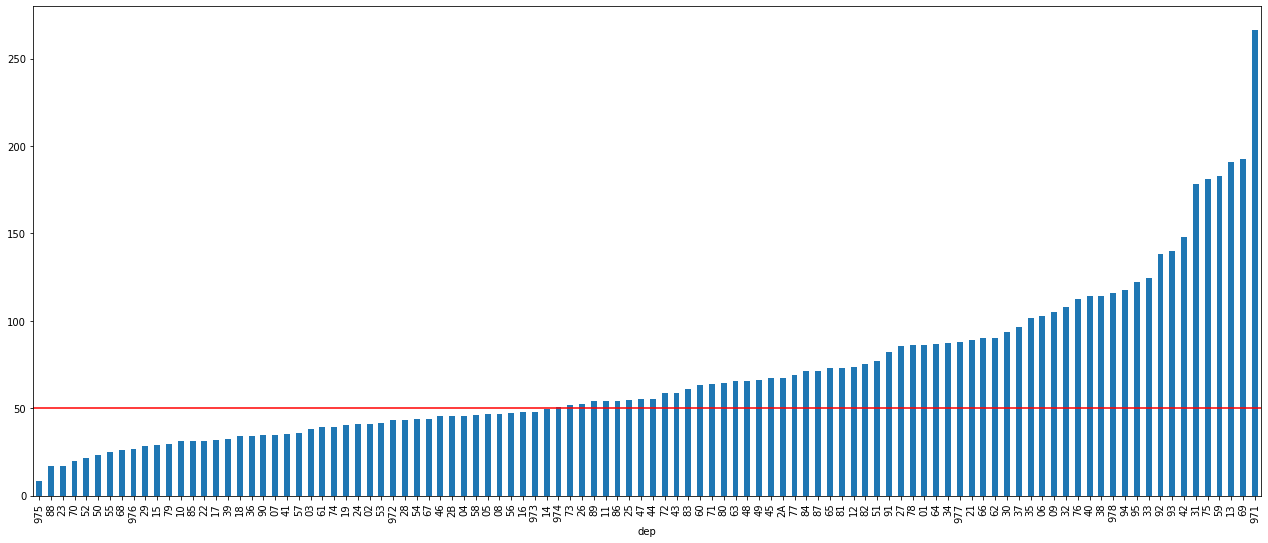

In [162]:
(gp_today_dep.sum().P_normed / 2 / 7).sort_values().plot.bar(figsize=(22,9))
plt.axhline(50, c='red')

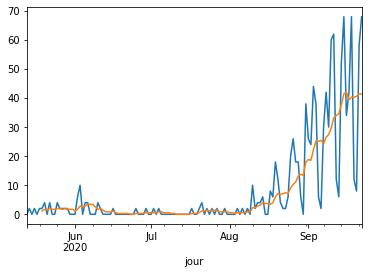

In [163]:
plot_incidence('43')

In [27]:
url_indic = (
    "https://www.data.gouv.fr/fr/datasets/r/4acad602-d8b1-4516-bc71-7d5574d5f33e"
)

In [28]:
!curl -LO $url_indic

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   461  100   461    0     0   1546      0 --:--:-- --:--:-- --:--:--     0-:--:-- --:--:--  1546
100 1916k  100 1916k    0     0   236k      0  0:00:08  0:00:08 --:--:--  259k


In [31]:
!head "4acad602-d8b1-4516-bc71-7d5574d5f33e"

"extract_date","departement","region","libelle_reg","libelle_dep","tx_incid","R","taux_occupation_sae","tx_pos","tx_incid_couleur","R_couleur","taux_occupation_sae_couleur","tx_pos_couleur","nb_orange","nb_rouge"
"2020-04-04","01",84,"Auvergne Rh�ne Alpes","Ain",NA,NA,134,NA,"","","rouge","",0,1
"2020-04-07","01",84,"Auvergne Rh�ne Alpes","Ain",NA,NA,135.1,NA,"","","rouge","",0,1
"2020-04-08","01",84,"Auvergne Rh�ne Alpes","Ain",NA,NA,131.7,NA,"","","rouge","",0,1
"2020-04-05","01",84,"Auvergne Rh�ne Alpes","Ain",NA,NA,139.4,NA,"","","rouge","",0,1
"2020-04-06","01",84,"Auvergne Rh�ne Alpes","Ain",NA,NA,140.1,NA,"","","rouge","",0,1
"2020-04-15","01",84,"Auvergne Rh�ne Alpes","Ain",NA,NA,114.3,NA,"","","rouge","",0,1
"2020-04-16","01",84,"Auvergne Rh�ne Alpes","Ain",NA,NA,112.3,NA,"","","rouge","",0,1
"2020-04-17","01",84,"Auvergne Rh�ne Alpes","Ain",NA,NA,107.5,NA,"","","rouge","",0,1
"2020-04-18","01",84,"Auvergne Rh�ne Alpes","Ain",NA,NA,103.4,NA,"","","rouge","",0,1


In [33]:
df_indic = pd.read_csv(
    "4acad602-d8b1-4516-bc71-7d5574d5f33e", sep=",", encoding="ISO-8859-1"
)

In [41]:
df_indic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18988 entries, 0 to 18987
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   extract_date                 18988 non-null  object 
 1   departement                  18988 non-null  object 
 2   region                       18988 non-null  int64  
 3   libelle_reg                  18988 non-null  object 
 4   libelle_dep                  18988 non-null  object 
 5   tx_incid                     13029 non-null  float64
 6   R                            2746 non-null   float64
 7   taux_occupation_sae          18988 non-null  float64
 8   tx_pos                       13029 non-null  float64
 9   tx_incid_couleur             13029 non-null  object 
 10  R_couleur                    2746 non-null   object 
 11  taux_occupation_sae_couleur  18988 non-null  object 
 12  tx_pos_couleur               13029 non-null  object 
 13  nb_orange       

<AxesSubplot:>

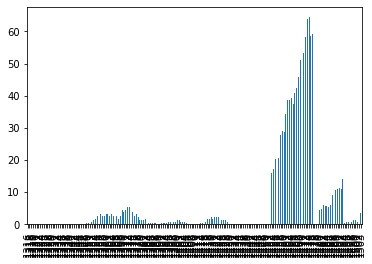

In [51]:
df_indic[df_indic.departement == "43"].tx_incid.plot.bar()

In [53]:
df_indic[df_indic.departement == "43"]

,extract_date,departement,region,libelle_reg,libelle_dep,tx_incid,R,taux_occupation_sae,tx_pos,tx_incid_couleur,R_couleur,taux_occupation_sae_couleur,tx_pos_couleur,nb_orange,nb_rouge
1316,2020-03-19,43,84,Auvergne Rhône Alpes,Haute-Loire,NaN,NaN,14.1,NaN,NaN,NaN,vert,NaN,0,0
1317,2020-03-20,43,84,Auvergne Rhône Alpes,Haute-Loire,NaN,NaN,15.6,NaN,NaN,NaN,vert,NaN,0,0
1318,2020-03-18,43,84,Auvergne Rhône Alpes,Haute-Loire,NaN,NaN,6.3,NaN,NaN,NaN,vert,NaN,0,0
1319,2020-04-01,43,84,Auvergne Rhône Alpes,Haute-Loire,NaN,NaN,120.2,NaN,NaN,NaN,rouge,NaN,0,1
1320,2020-04-02,43,84,Auvergne Rhône Alpes,Haute-Loire,NaN,NaN,125.2,NaN,NaN,NaN,rouge,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,2020-08-08,43,84,Auvergne Rhône Alpes,Haute-Loire,1.32,NaN,3.4,0.378788,vert,NaN,vert,vert,0,0
1500,2020-08-09,43,84,Auvergne Rhône Alpes,Haute-Loire,1.32,NaN,3.4,0.377358,vert,NaN,vert,vert,0,0
1501,2020-08-06,43,84,Auvergne Rhône Alpes,Haute-Loire,0.88,NaN,3.2,0.232558,vert,NaN,vert,vert,0,0
1502,2020-08-11,43,84,Auvergne Rhône Alpes,Haute-Loire,3.53,1.17,3.0,1.003764,vert,orange,vert,vert,1,0
